<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習に関する問題

## 用語の理解を問う問題
- 以下の問題について、正解となる選択肢を出力してください

### 問題16 過度に適合する現象 (3点)
モデルが訓練データに過度に適合し、新しいデータに対する汎化性能が低下する現象は何と呼ばれますか？
   1. アンダーフィッティング
   2. オーバーフィッティング
   3. クロスバリデーション
   4. 正則化

In [3]:
# 正解を出力してください
print('2') # オーバーフィッティングは、モデルが訓練データに過度に適合し、新しいデータに対する汎化性能が低下する現象を指します。過学習とも言います。

2


### 問題17 評価指標 (3点)
予測値と実際の値の二乗誤差の平均を取った指標は何と呼ばれますか？
   1. 平均絶対誤差（MAE）
   2. 平均二乗誤差（MSE）
   3. 二乗平均平方根誤差（RMSE）
   4. R-squared（決定係数）

In [4]:
# 正解を出力してください
print('2')  # 平均二乗誤差（MSE）は、予測値と実際の値の差の二乗の平均を取った指標です。

2


### 問題18 回帰問題 (3点)
次のうち、回帰問題の例として最も適切なものはどれですか？
   1. Eメールがスパムかどうかを判定する
   2. 顧客の年齢を予測する
   3. 画像が犬か猫かを識別する
   4. 文章の感情（ポジティブ/ネガティブ）を分析する

In [5]:
print('2')  # 年齢は連続的な数値であるため、これは回帰問題の典型的な例です。

2


## プログラムを書く問題
- Titanicのデータセットを使って、モデルの作成、評価を行ってください。

### Titanicのデータセット
- タイタニック号の乗船リストから、どのような属性の人が "助かる" かを予測 するデータセットです。
- `data/titanic_train.csv` のデータを読み込んで処理して行きましょう。
- 各列の名称と内容は以下の通りです。

| Variable | Definition | Key |
| --- | --- | --- | 
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| age | Age in years |
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |
| ticket | Ticket number | |
| fare | Passenger fare	 | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### 問題19 モデルの作成 (9点)
- データセットを読み込み、欠損値の処理やカテゴリカル変数の対策を行って、モデルを作成してみましょう
  - データセットの読み込み（02pandas.ipynbと同じプログラムで大丈夫です）
  - 欠損値の対策（02pandas.ipynbと同じプログラムで大丈夫です）
  - カテゴリカル変数の対策
  - 説明変数と目的変数に分ける
  - モデルを学習する（学習に使用するモデルは何でも良いです。例：SVC、RandomForestClassifierなど）

In [43]:
# ライブラリのimport
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [7]:
# データファイルパス定義
TITANIC_TRAIN_CSV = "./data/titanic_train.csv"

In [8]:
# read_csvを使ってcsvを読み込みます
df_titanic = pd.read_csv(TITANIC_TRAIN_CSV, index_col='PassengerId') # PassengerIdがindexに使用できるため、index_col='PassengerId'を指定します
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# ageを埋める
age_mean = df_titanic['Age'].mean()
df_titanic['Age'] = df_titanic['Age'].fillna(age_mean)

In [10]:
# Cabinを埋める
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('Unknown')

In [13]:
# ひとまずNameとTicketは使用せずに削除する
df_titanic2 = df_titanic.drop(['Name','Ticket'], axis=1)

# Cabinは1文字目だけ使用する
df_titanic2['Cabin'] = df_titanic2['Cabin'].str[0]
df_titanic2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,U,S
2,1,1,female,38.0,1,0,71.2833,C,C
3,1,3,female,26.0,0,0,7.9250,U,S
4,1,1,female,35.0,1,0,53.1000,C,S
5,0,3,male,35.0,0,0,8.0500,U,S


In [16]:
# カテゴリカル変数の対策
categories = ['Sex','Cabin','Embarked']  # カテゴリカル変数の対象とする列を指定する

df_titanic3 = df_titanic2.copy()  # DataFrameを書き換えるため、変換する
for category in categories:
    label_encoder = LabelEncoder()  # 文字列を数値に変換するクラスのインスタンスを作成
    label_encoder = label_encoder.fit(df_titanic3[category])  # fit関数で文字列と数値の関係を取得
    df_titanic3[category] = label_encoder.transform(df_titanic3[category])  # transformで変換を実行
    df_titanic3[category] = df_titanic3[category].astype('category') # カテゴリカル変数には専用の型'category'があるため、型変換しておく
    print(df_titanic3[category].value_counts())  # 変換後の値を表示

Sex
1    577
0    314
Name: count, dtype: int64
Cabin
8    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
7      1
Name: count, dtype: int64
Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64


In [17]:
# 説明変数と目的変数に分ける
X = df_titanic3.iloc[:,1:]
y = df_titanic3.iloc[:,0]

In [18]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)  # stratifyを指定すると層別にきれいに分けることができます

In [20]:
# 学習する
svc_model = svm.SVC()    # モデルを作る
svc_model.fit(X_train, y_train)    # 訓練する

SVC()

### 問題20 モデルの評価 (12点)
- 以下のいずれかの評価を少なくとも２つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - 正答率と誤った個数を算出する
  - classification reportを作成する
  - 混合行列(confusion matrix)を表示する
  - FeatureImportanceを表示する(決定木系のモデルでしか使用できません)

In [22]:
# 正答率と誤った個数を算出する
accuracy = svc_model.score(X_test, y_test)    # 正答率を調べる
print(f"正答率 = {accuracy}")

predicted = svc_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.6529850746268657
誤った個数：93


- 全く当てられないよりはマシ、くらいの正答率ですね
- ２値分類なので、どちらか一方を適当に予測しただけでも50%を超えるはずですからね
- 不均衡データなので、どちらか一方を当てに行くようなモデルになっている可能性はありそうです

In [23]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
0,0.659292,0.903030,0.762148,165.000000
1,0.619048,0.252427,0.358621,103.000000
accuracy,0.652985,0.652985,0.652985,0.652985
macro avg,0.639170,0.577729,0.560385,268.000000
weighted avg,0.643825,0.652985,0.607061,268.000000


- 死者のrecallが9割なのに対し、生存が25%とかなり偏りがあります。
- モデルの予測傾向としては、かなり死者の方に偏っていることになります。

In [27]:
result_labels = ['No','Yes']
result_labels

['No', 'Yes']

confusion matrix


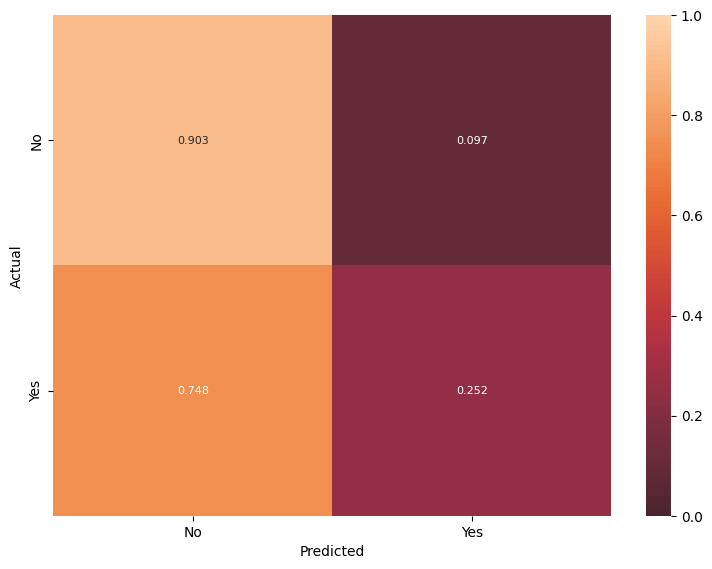

In [28]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- 実際は生存なのにも関わらず、死亡と予測している傾向が強いです

---
---

### RandomForestでの学習例

In [37]:
# RandomForestで学習させる
rf_model = RandomForestClassifier(max_depth=5)    # max_depth のパラメータを指定する
rf_model.fit(X_train, y_train)     # 訓練データと教師データで学習する

RandomForestClassifier(max_depth=5)

In [38]:
# モデルの学習結果を評価する
accuracy = rf_model.score(X_test, y_test)    # テストデータで試す
print(f"正答率 = {accuracy}")

predicted = rf_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.8246268656716418
誤った個数：47


- かなり正答率あがりましたね

In [39]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
0,0.810526,0.933333,0.867606,165.000000
1,0.858974,0.650485,0.740331,103.000000
accuracy,0.824627,0.824627,0.824627,0.824627
macro avg,0.834750,0.791909,0.803969,268.000000
weighted avg,0.829146,0.824627,0.818691,268.000000


- 生存時のrecallがかなり改善されています
- macro avgもかなり上がっていますね

confusion matrix


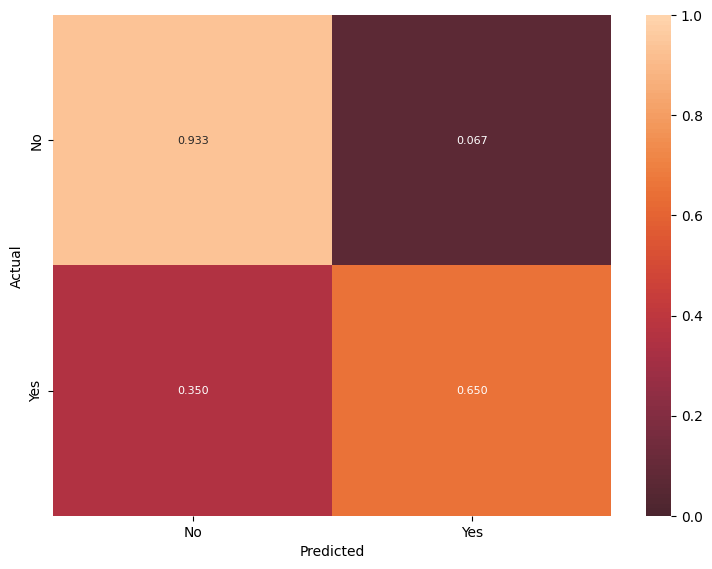

In [40]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- 予測がNoで実際Yesの結果がだいぶ減りました

In [44]:
def _convert_column_name_for_feature_importance(columns):
    new_columns = []
    for name_src in columns:
        new_columns.append(name_src)

    return new_columns

# figureをmargin付きで作成する
def _make_figure_with_margin(ax_w_px=400, ax_h_px=300, ax_margin_px = (50, 50, 50, 50), fig_dpi=100):

    # サイズ指定のための処理 ↓↓ ここから ↓↓ 
    ax_w_inch = ax_w_px / fig_dpi
    ax_h_inch = ax_h_px / fig_dpi
    ax_margin_inch = (ax_margin_px[0] / fig_dpi,
                      ax_margin_px[1] / fig_dpi,
                      ax_margin_px[2] / fig_dpi,
                      ax_margin_px[3] / fig_dpi)  # Left,Top,Right,Bottom [inch]

    fig_w_inch = ax_w_inch + ax_margin_inch[0] + ax_margin_inch[2] 
    fig_h_inch = ax_h_inch + ax_margin_inch[1] + ax_margin_inch[3]

    fig = plt.figure(dpi=fig_dpi, figsize=(fig_w_inch, fig_h_inch))
    ax_p_w = [Size.Fixed(ax_margin_inch[0]),Size.Fixed(ax_w_inch)]
    ax_p_h = [Size.Fixed(ax_margin_inch[1]),Size.Fixed(ax_h_inch)]
    divider = Divider(fig, (0.0, 0.0, 1.0, 1.0), ax_p_w, ax_p_h, aspect=False)
    ax = Axes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1,ny=1))
    fig.add_axes(ax)
    return fig, ax

# FeatureImportanceをplotする
def _plot_feature_importances(x_column_names, best_estimator):
    importances = pd.DataFrame(
        {"features": _convert_column_name_for_feature_importance(x_column_names),
         "importances": best_estimator.feature_importances_})

    importances = importances[importances['importances'] != 0] # 重要度ゼロのものは表示しない
    importances.sort_values(by="importances", inplace=True, ignore_index=True, ascending=True)
    
    fig, ax = _make_figure_with_margin(800, 100+50*len(importances), ax_margin_px = (150, 50, 50, 50))
    plt.barh(importances['features'], importances['importances'])
    plt.title("Feature Importances (Zero variables are hidden)", fontsize=14)
    plt.show()

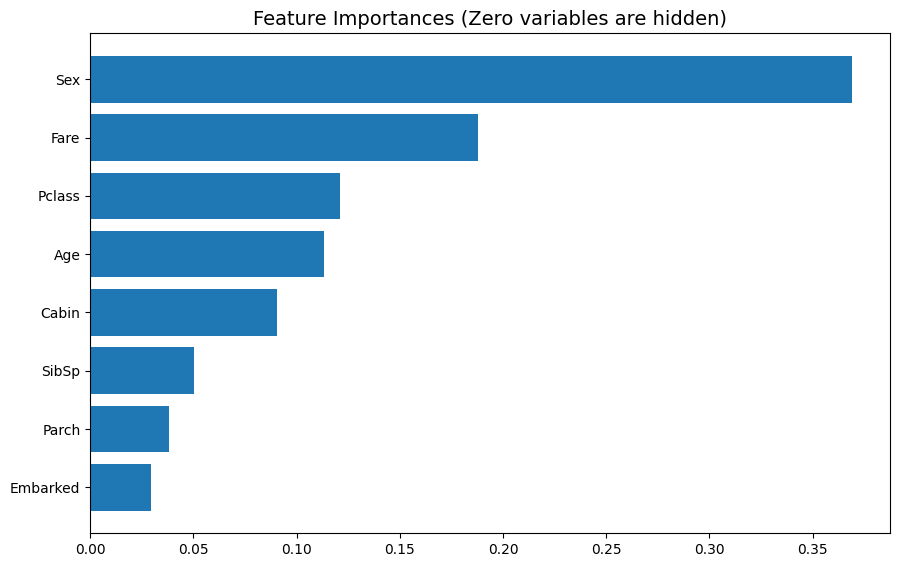

In [45]:
_plot_feature_importances(X_train.columns, rf_model)

- 性別、乗船料が高いですね
- PclassはFareとの相関が高かったので納得の高さ
- Ageはもう少し重要度が高くても良さそうですが、今のところは平均値を入れてしまっているので、低く出てしまっている可能性はありそうです。

---
---
---
---
---